In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the data
train_data = pd.read_csv("/kaggle/input/competitions/titanic/train.csv")

# Preview the data to make sure it loaded
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data visualization
Now that I've imported the data I need to visualize them for the next step

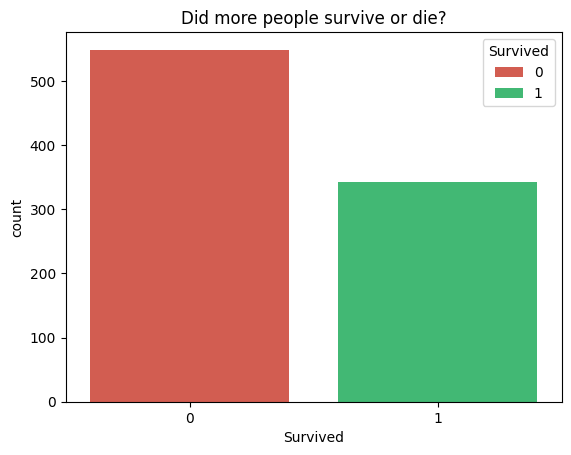

In [3]:
custom_palette = {0: "#E74C3C", 1: "#2ECC71"}
sns.countplot(x='Survived', data=train_data, hue='Survived', palette=custom_palette)
plt.title("Did more people survive or die?")
plt.show()

From the graph I notice that there is a 60% chance that a person would **NOT** survive. Now I need to choose some features to test the survival rate so I can decide to use which one in my model training

My first theory is about gender: **Who has more chance to survive women or man ?**

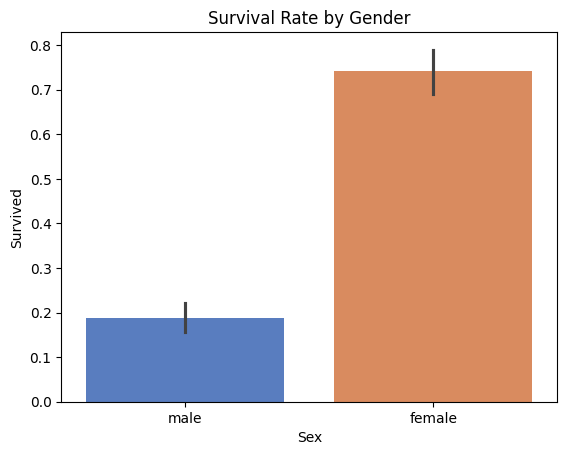

In [4]:
sns.barplot(x='Sex',hue='Sex', legend=False, y='Survived', data=train_data, palette="muted")
plt.title("Survival Rate by Gender")
plt.show()

I noticed that the survival rate for women is suprising high compare to their counterpart. This indicate that the model should use the **Sex** feature <br>
Next I want to see the **class rate (Pclass) effect on survival rate** 

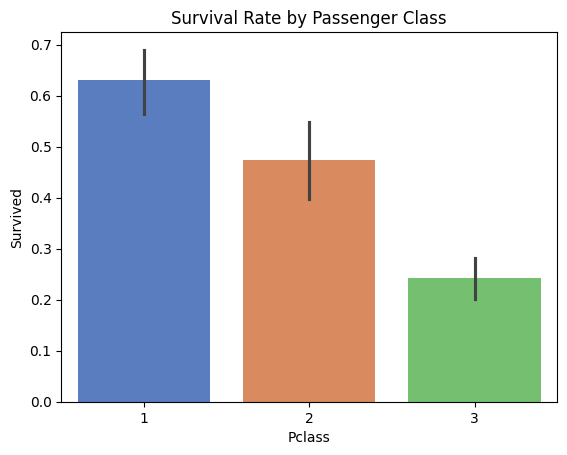

In [5]:
sns.barplot(x='Pclass', y='Survived', hue='Pclass', data=train_data, palette="muted", legend=False)
plt.title("Survival Rate by Passenger Class")
plt.show()

It seems that the higher the class rate the higher the chance of survival so the class rate also affect the survival rate.Thus **PClass** feature is also important for the model<br>
My final test is about the age distribution: **Which age group is more protized ?**

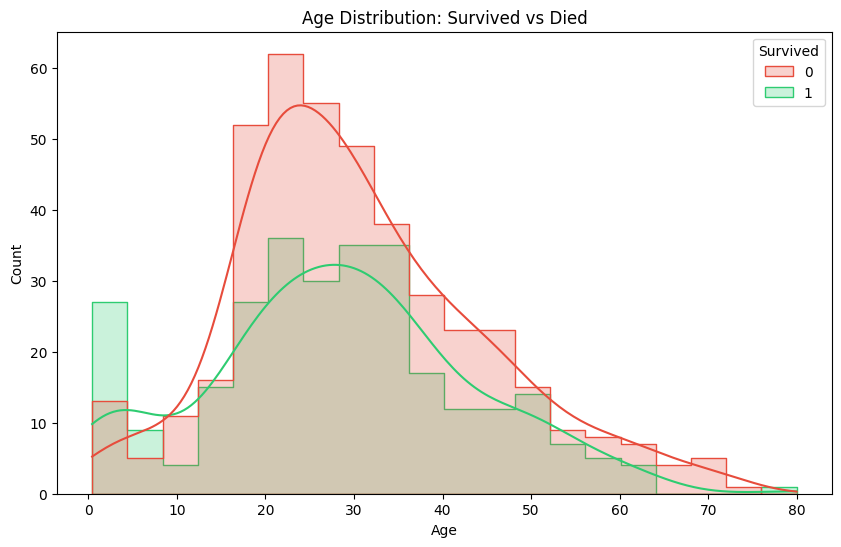

In [6]:
plt.figure(figsize=(10,6))
sns.histplot(data=train_data, x='Age', hue='Survived', kde=True, palette=custom_palette, element="step")
plt.title("Age Distribution: Survived vs Died")
plt.show()

From the diagram, it is clearly that the children age group mostly from **0 - 10** has more chance to survived and the middle age from **20 - 40** has less chance. The red line and green line is not identical so **Age** is a valueable feature

## Data cleaning
Now that I've completed the data visualize for deciding the features, I need to take a closer look to the data itself for the processing step

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


I noticed that there is some NaN value in 3 main columns: **Age** (177 values), **Cabin** (687 values) and **Embarked** (2 values). 

Since the missing data in **Cabin** is to many, I decide to delete this column and not take it into the training.

In [8]:
# 1. DROP CABIN COLUMN
train_data.drop(columns=['Cabin'], inplace=True)

Since 2 missing values from **Embark** is insignificant compared to 891 total values, I will delete those rows with null value.

In [9]:
# 2. DROP ROWS WITH MISSING EMBARKED
train_data.dropna(subset=['Embarked'], inplace=True)

For **Age**, I will fill the null value with the median age of the dataset

In [10]:
# 3. FILL AGE WITH MEDIAN
# We calculate the median first
age_median = train_data['Age'].median()
# Then we fill the holes
train_data.fillna({'Age':age_median}, inplace=True)

In [11]:
# VERIFY
print(train_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


Now that my data is clean, I will move on the next step: **converting text to number**. There are 2 main columns with text that I need to convert: **Sex** and **Embark**. However I don't know if **Embark** is useful for the training so I will run a quick visualisation here.

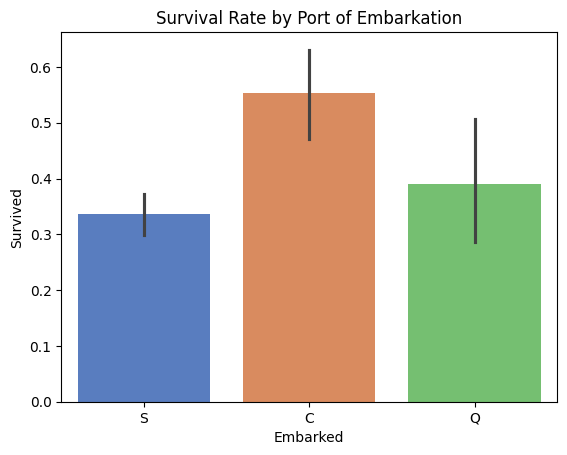

In [12]:
sns.barplot(x='Embarked', y='Survived', hue='Embarked', legend=False, data=train_data, palette="muted")
plt.title("Survival Rate by Port of Embarkation")
plt.show()

As the graph show, the C (Cherbourg) port has a higher survival rate than the others so **Embark** also matters.

Now I will first convert the **Sex** value to number with **0** for **Male** and **1** for **Female**

In [13]:
train_data['Sex']=train_data["Sex"].map({"male":0,"female":1})

Next, I will convert the **Embark** value to number

In [14]:
train_data['Embarked'] = train_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [15]:
# Verify
print(train_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  Embarked  
0         A/5 21171   7.2500         0  
1          PC 17599  71.2833         1  
2  STON/O2. 3101282   7.9250         0  
3            113803  53.1000         0  
4            373450   8.0500         0  


## Model Training
Now that I have the processed data, the next step is use them for model training.<br>
First, I will select the features and target

In [16]:
# 1. SELECT FEATURES (X)
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train_data[features]

# 2. SELECT TARGET (y)
y = train_data['Survived']

Next, I need to split the data: 80% to teach the model, 20% to test it (Validation)

In [17]:
from sklearn.model_selection import train_test_split
# 3. SPLIT DATA
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

And then I will choose a model to train with these data, in this case I choose Random Forest due to the **Non-Linearity** and the **Interaction** of the survival rate and also after it trains, this model can tell **which column is the most important**  

In [18]:
from sklearn.ensemble import RandomForestClassifier
# 4. TRAIN THE MODEL
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=1)

Finally, I use the other 20% of the dataset to evaluate the performance of the model

In [19]:
from sklearn.metrics import accuracy_score
# 5. EVALUATE
predictions = model.predict(X_val)
accuracy = accuracy_score(y_val, predictions)
print(f"Model Accuracy: {accuracy:.2%}")

Model Accuracy: 83.71%
